# Imports

In [2]:
import numpy as np
import os
import pickle
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.single_stage_yamnet_pretrained import *

if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    path_prefix = ''
else:
    path_prefix = '..'

split = 'train'
file_path = os.path.join(path_prefix, 'data/detection', split)

2025-11-21 19:40:10.260816: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-21 19:40:10.274057: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-21 19:40:28.664217: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
data = pickle.load(open(os.path.join(path_prefix, f'data/processed/detection_{split}.p') , 'rb'))
print(data.keys())

dict_keys(['sr', 'S_db', 'files', 'onset', 'offset', 'event_label', 'background_label'])


car_horn
6.469348537816025
8.400449292655296
Detected events:
[0] siren: Onset: 6.72s, Offset: 7.68s


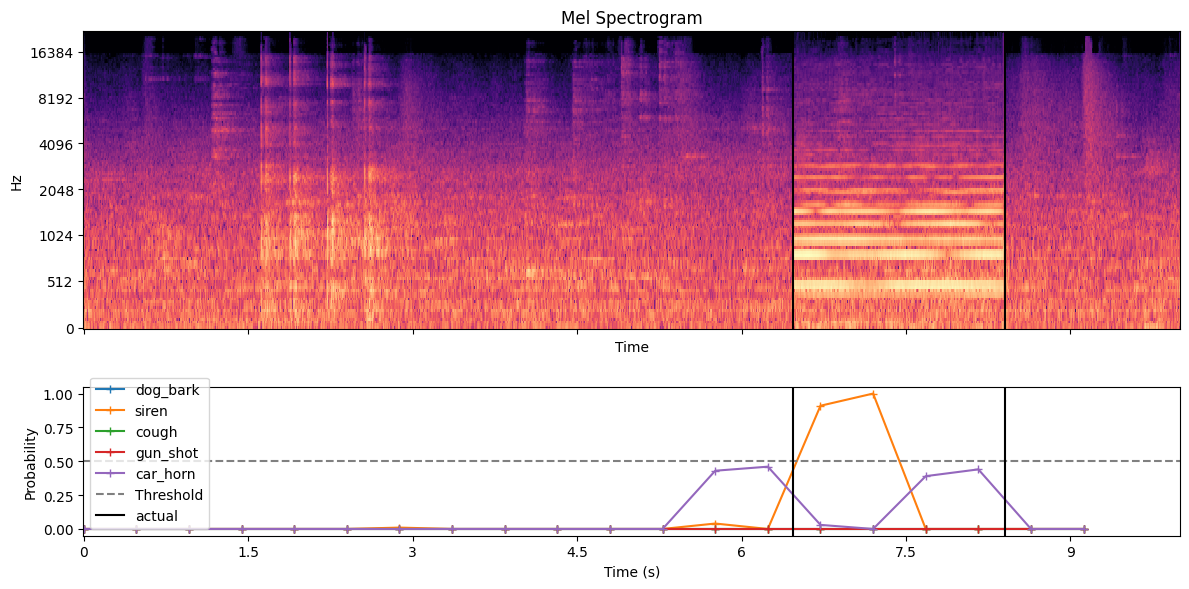

In [4]:
# A single example
train_idx = 4
threshold = 0.5
audio_path = f"{file_path}/{split}_scene_0{str(train_idx).zfill(3)}.wav"
audio, sr = librosa.load(audio_path, sr=None)

events, probs = detect_events(audio, sr, threshold = threshold)
print(data['event_label'][train_idx])
print(data['onset'][train_idx])
print(data['offset'][train_idx])

print("Detected events:")
for i, ev in enumerate(events):
    print(f"[{i}] {ev['event_type']}: Onset: {ev['onset']:.2f}s, Offset: {ev['offset']:.2f}s")

plot_detection(audio, 16000, probs.T, HOP_TIME, labels = (data['onset'][train_idx], data['offset'][train_idx]), threshold = threshold)